***
***
***

<br><h2>Session 8a | Introduction to Unsupervised Learning and Principal Component Analysis</h2>
<h4>DAT-5303 | Machine Learning</h4>
Chase Kusterer - Faculty of Analytics<br>
Hult International Business School<br><br><br>

***
***
***

<h3>Part I: Preparation</h3><br>
Run the following code to import necessary packages, load data, and set display options. 

In [1]:
########################################
# importing packages
########################################
import pandas            as pd  # data science essentials
import matplotlib.pyplot as plt # fundamental data visualization
import seaborn           as sns # enhanced visualization
import sys                      # system-specific parameters and functions


# new libraries
from sklearn.decomposition import PCA            # pca
from sklearn.datasets      import load_digits    # digits dataset
from sklearn.manifold      import TSNE           # t-SNE


########################################
# loading data and setting display options
########################################
# loading data
digits = load_digits()


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)
pd.np.set_printoptions(threshold=sys.maxsize)


########################################
# chacking the type of the dataset
########################################
type(digits)

/Users/stephaniedominguezandrade/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


sklearn.utils.Bunch

***
***

<br>
<strong>User-Defined Functions</strong><br>
Run the following code to load the user-defined functions used throughout this Notebook.

In [2]:
########################################
# pca_plotter
########################################
# optional color scheme
colors_lst = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
              "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]


# pca_plotter
def pca_plotter(bunch, colors = None):
    """
PARAMETERS
----------
bunch        : Bunch object to be used in PCA
colors       : color coding for target labels, default None
"""

    # INSTANTIATING a PCA object
    pca = PCA(n_components = 2,
              random_state = 802)


    # FITTING and TRANSFORMING the data
    dataset_pca = pca.fit_transform(bunch.data)

    
    # setting figure options
    plt.figure(figsize=(10, 10))
    plt.xlim(dataset_pca[:, 0].min(), dataset_pca[:, 0].max())
    plt.ylim(dataset_pca[:, 1].min(), dataset_pca[:, 1].max())


    # data vizualization
    for i in range(len(bunch.data)):

        plt.text(dataset_pca[i, 0],
                 dataset_pca[i, 1],
                 str(bunch.target[i]),
                 color = colors[bunch.target[i]],
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xlabel("First principal component")
    plt.ylabel("Second principal component")
    plt.show()

    
########################################
# tsne_plotter
########################################
# optional color scheme
colors_lst = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
              "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]


# tsne_plotter
def tsne_plotter(bunch, colors = None):
    """
PARAMETERS
----------
bunch        : Bunch object to be used in TSNE
colors       : color coding for target labels, default None
"""
    
    # INSTANTIATING a PCA object
    tsne = TSNE(random_state = 508)

    
    # FITTING and TRANSFORMING the data
    dataset_tsne = tsne.fit_transform(bunch.data)

    
    # setting figure options
    plt.figure(figsize=(10, 10))
    plt.xlim(dataset_tsne[:, 0].min(), dataset_tsne[:, 0].max() + 1)
    plt.ylim(dataset_tsne[:, 1].min(), dataset_tsne[:, 1].max() + 1)

    
    # data vizualization
    for i in range(len(bunch.data)):

        plt.text(dataset_tsne[i, 0],
                 dataset_tsne[i, 1],
                 str(bunch.target[i]),
                 color = colors[bunch.target[i]],
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xlabel("t-SNE feature 0")
    plt.xlabel("t-SNE feature 1")
    plt.show()

***
***

<br>

Unlike the previous datasets analyzed in this course, the digits data is a <a href="https://pypi.org/project/bunch/">Bunch object</a>. A Bunch is very similar to a dictionary. In fact, it is a subclass of a dictionary that is highly compatible with Javascript (JSON) and YAML, making it an incredibly useful structure. <strong>It is very likely that you will encounter this structure as a business analyst</strong>. It is commonly used in data that is collected digitally.<br><br>
To get started, let's take a look at the keys of this object. Keys can be thought of in the same way as primary keys in a relational database (they uniquely identify each table of information). Unlike relational databases, Bunch objects generally do not hve relationships (linkage) between tables.

In [3]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

***
***

<br>
As with anything new in data science, it is important to <strong>read the documentation</strong>. For the digits dataset, this information can be found under the key <strong>'DESCR'</strong>. Note that this is different from accessing a help( ) file, which provides documentation on Python objects as opposed to data.<br><br><br>
<strong>Challenge 1</strong><br>
Complete the code below to access the description of the digits dataset.

In [4]:
print(digits.get('DESCRIPTION'))

None


***
***

<br>
<strong>Challenge 2</strong><br>
Write code to access the information in the <strong>'data'</strong> key for the digits dataset.

In [6]:
# printing description
print(digits.get('data'))

[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.

***
***

<br>
<strong>Challenge 3</strong><br>
Write code to access the information in the <strong>'target'</strong> key for the digits dataset.

In [7]:
# printing target
print(digits.get('target'))

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9
 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4
 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7
 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2
 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 3 1 3 9 1
 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 5 4 8 8 4 9 0 8 9 8 0 1 2
 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9
 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8
 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2
 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 3 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0
 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2
 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7
 6 8 4 3 1 4 0 5 3 6 9 6 

***
***

<br>
<strong>Challenge 4</strong><br>
Write code to access the information in the <strong>'target_names'</strong> key for the digits dataset.

In [8]:
# printing target_names
print(digits.get('target_names'))

[0 1 2 3 4 5 6 7 8 9]


***
***

<br>
<strong>Challenge 5</strong><br>
Write code to access the information in the <strong>'images'</strong> key for the digits dataset.

In [9]:
# printing images
print(digits.get('images'))

[[[ 0.  0.  5. 13.  9.  1.  0.  0.]
  [ 0.  0. 13. 15. 10. 15.  5.  0.]
  [ 0.  3. 15.  2.  0. 11.  8.  0.]
  [ 0.  4. 12.  0.  0.  8.  8.  0.]
  [ 0.  5.  8.  0.  0.  9.  8.  0.]
  [ 0.  4. 11.  0.  1. 12.  7.  0.]
  [ 0.  2. 14.  5. 10. 12.  0.  0.]
  [ 0.  0.  6. 13. 10.  0.  0.  0.]]

 [[ 0.  0.  0. 12. 13.  5.  0.  0.]
  [ 0.  0.  0. 11. 16.  9.  0.  0.]
  [ 0.  0.  3. 15. 16.  6.  0.  0.]
  [ 0.  7. 15. 16. 16.  2.  0.  0.]
  [ 0.  0.  1. 16. 16.  3.  0.  0.]
  [ 0.  0.  1. 16. 16.  6.  0.  0.]
  [ 0.  0.  1. 16. 16.  6.  0.  0.]
  [ 0.  0.  0. 11. 16. 10.  0.  0.]]

 [[ 0.  0.  0.  4. 15. 12.  0.  0.]
  [ 0.  0.  3. 16. 15. 14.  0.  0.]
  [ 0.  0.  8. 13.  8. 16.  0.  0.]
  [ 0.  0.  1.  6. 15. 11.  0.  0.]
  [ 0.  1.  8. 13. 15.  1.  0.  0.]
  [ 0.  9. 16. 16.  5.  0.  0.  0.]
  [ 0.  3. 13. 16. 16. 11.  5.  0.]
  [ 0.  0.  0.  3. 11. 16.  9.  0.]]

 [[ 0.  0.  7. 15. 13.  1.  0.  0.]
  [ 0.  8. 13.  6. 15.  4.  0.  0.]
  [ 0.  2.  1. 13. 13.  0.  0.  0.]
  [ 0.  0.  2. 15. 11.

***
***

<br>
<h3>Part II: Understanding Image Data</h3><br>
Note that each of the original hand-written digits was written on white paper with black ink, creating <a href="https://whatis.techtarget.com/definition/grayscale">grayscale images</a>. As can be observed from above, each image is stored as a matrix of numbers, and each number represents the amount of shading in a given cell. A value of 0 implies that a cell was completely white and a value of 16 implies that a cell was completely black.<br><br>
Notice also that since each image is its own matrix, we have three dimensions of indexing, which can be interpreted as follows:<br><br>

~~~
[IMAGE NUMBER, ROWS, COLUMNS]
~~~

<br>
Run the following code to output the shape of 'images'. 

In [10]:
digits.get('images').shape

(1797, 8, 8)

***
***

<br>
Run the following code to store the first image as an object and view its numerical matrix.

In [11]:
digit_images = digits.get('images')
first_digit = digit_images[0, :, :]

print(first_digit)

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


***
***

<br>
<strong>Challenge 6</strong><br>
Based on the matrix above, can you guess the digit for the first image in the dataset?<br><br><br>

***
***

<br>
<strong>Challenge 7</strong><br>
As with many aspects of data analysis, it may be easier to visualize an image in order to improve efficiency of interpretation. As such, use the space below to develop a heatmap for the first digit.

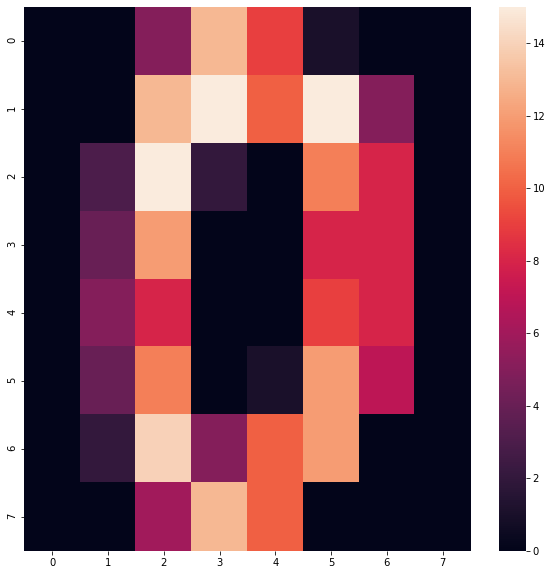

In [12]:
# setting display size
fig, ax = plt.subplots(figsize = (10,10))


# creating a heatmap

sns.heatmap(first_digit)

# displaying the plot




***
***

<br>
Run the following code to view images for each digit.

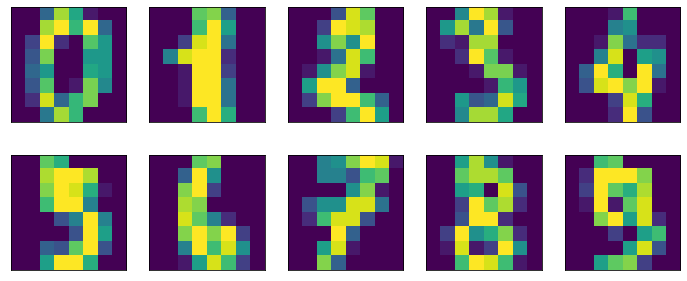

In [13]:
# printing digit images
fig, ax = plt.subplots(2, 5,
                       figsize=(12, 5),
                       subplot_kw={'xticks':(),
                                   'yticks': ()})


for axes, img in zip(ax.ravel(), digits.images):
    axes.imshow(img)

***
***

<br>
<h3>Part III: Principal Component Analysis (PCA)</h3><br>
Note that the data should be scaled before running PCA. This has already been done for the digits data.

* no train/test split because no response variable (this set has one because it's also a classification problem)
* instantiate, fit, transform
* no score step because no response variable

In [14]:
# INSTANTIATING a PCA model
pca = PCA(n_components = 2,
          random_state = 802)


# FITTING and TRANSFORMING the digits data
digits_pca = pca.fit_transform(digits.data)

***
***

<br>
It is important to understand how much variance has been accounted for by each critical component. We can do so through the attribute <strong>.explained_variance_ratio_</strong> on the instantiated object as in the coding cell below.

In [15]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

***
***

<br>
Also note that since the model was limited to two principal components, we are able to graph its results.

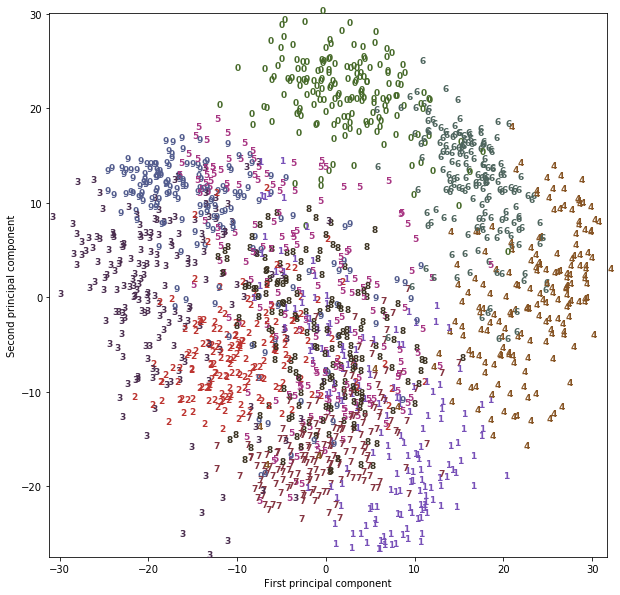

In [16]:
# calling pca_plotter
pca_plotter(bunch  = digits,
            colors = colors_lst)

***
***

<br>
As can be observed, several of the digits overlap in terms of their <strong>factor loadings</strong>, or values for each principal component. Visually, this can be addressed using an unsupervised learning technique known as <a href="https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html">t-distributed Stochastic Neighbor Embedding (TSNE)</a>. This technique is used to visualize similarities between high dimensional data.<br><br>
<strong>TSNE</strong><br>
Run the following code to more dramatically visualize the similarities between observations in the digits dataset.

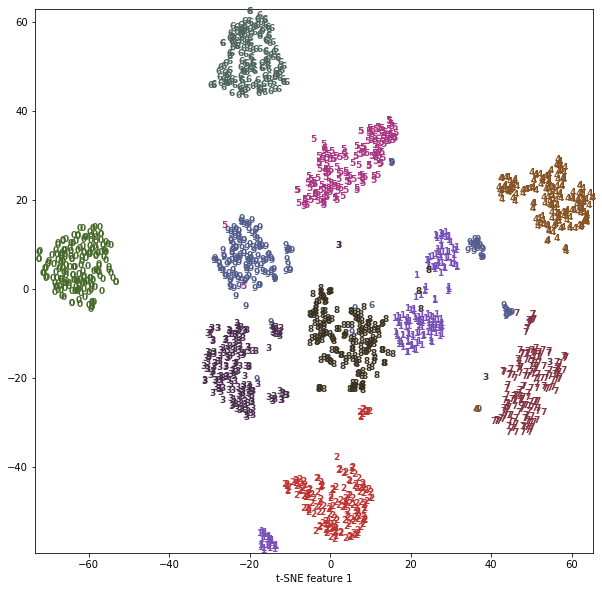

In [17]:
# calling tsne_plotter
tsne_plotter(bunch = digits,
             colors = colors_lst)

***
***

<br>

~~~
  _____   ___    ___  ____  ____    ____                                
 / ___/  /  _]  /  _]|    ||    \  /    |                               
(   \_  /  [_  /  [_  |  | |  _  ||   __|                               
 \__  ||    _]|    _] |  | |  |  ||  |  |                               
 /  \ ||   [_ |   [_  |  | |  |  ||  |_ |                               
 \    ||     ||     | |  | |  |  ||     |                               
  \___||_____||_____||____||__|__||___,_|                               
                                                                        
 ____   ____  ______  ______    ___  ____   ____   _____                
|    \ /    ||      ||      |  /  _]|    \ |    \ / ___/                
|  o  )  o  ||      ||      | /  [_ |  D  )|  _  (   \_                 
|   _/|     ||_|  |_||_|  |_||    _]|    / |  |  |\__  |                
|  |  |  _  |  |  |    |  |  |   [_ |    \ |  |  |/  \ |                
|  |  |  |  |  |  |    |  |  |     ||  .  \|  |  |\    |                
|__|  |__|__|  |__|    |__|  |_____||__|\_||__|__| \___|                
                                                                        
 ____  ____                                                             
|    ||    \                                                            
 |  | |  _  |                                                           
 |  | |  |  |                                                           
 |  | |  |  |                                                           
 |  | |  |  |                                                           
|____||__|__|                                                           
                                                                        
    __   ___   ___ ___  ____  _        ___  __ __                       
   /  ] /   \ |   |   ||    \| |      /  _]|  |  |                      
  /  / |     || _   _ ||  o  ) |     /  [_ |  |  |                      
 /  /  |  O  ||  \_/  ||   _/| |___ |    _]|_   _|                      
/   \_ |     ||   |   ||  |  |     ||   [_ |     |                      
\     ||     ||   |   ||  |  |     ||     ||  |  |                      
 \____| \___/ |___|___||__|  |_____||_____||__|__|                      
                                                                        
  _____ ____  ______  __ __   ____  ______  ____  ___   ____   _____ __ 
 / ___/|    ||      ||  |  | /    ||      ||    |/   \ |    \ / ___/|  |
(   \_  |  | |      ||  |  ||  o  ||      | |  ||     ||  _  (   \_ |  |
 \__  | |  | |_|  |_||  |  ||     ||_|  |_| |  ||  O  ||  |  |\__  ||__|
 /  \ | |  |   |  |  |  :  ||  _  |  |  |   |  ||     ||  |  |/  \ | __ 
 \    | |  |   |  |  |     ||  |  |  |  |   |  ||     ||  |  |\    ||  |
  \___||____|  |__|   \__,_||__|__|  |__|  |____|\___/ |__|__| \___||__|
                                                                        
~~~